## babble

A character level bigram model that tries to learn statistical relationships in the swahili language, to generate new text.

### 1. Load and inspect the data

In [1]:
data = open("./data/train.txt", "r").read()
text = data.strip("UNK")
set(text), len(set(text))

({'\n',
  ' ',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'},
 28)

In [2]:
# The test data has 28k unique words and about 1M words in total
# We will use the full dataset since repetion is good for the bigram to be more confident
b = {}
for ch1, ch2 in zip(text, text[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
    # print(ch1, ch2)
print(b)

{(' ', 't'): 38041, ('t', 'a'): 66111, ('a', 'a'): 25348, ('a', 'r'): 37541, ('r', 'i'): 46121, ('i', 'f'): 16672, ('f', 'a'): 24218, ('a', ' '): 617061, (' ', 'h'): 77078, ('h', 'i'): 71863, ('i', 'y'): 16696, ('y', 'o'): 35453, ('o', ' '): 128539, (' ', 'i'): 34074, ('i', 'l'): 51221, ('l', 'i'): 113821, ('i', 's'): 52610, ('s', 'e'): 24375, ('e', 'm'): 24167, ('m', 'a'): 100628, (' ', 'k'): 211047, ('k', 'u'): 132187, ('u', 'w'): 33415, ('w', 'a'): 233419, (' ', 'o'): 3158, ('o', 'n'): 24031, ('n', 'g'): 55555, ('g', 'e'): 11294, ('e', 'z'): 22941, ('z', 'e'): 4757, ('e', 'k'): 14288, ('k', 'o'): 17115, (' ', 'l'): 26238, ('l', 'a'): 41937, (' ', 'j'): 18068, ('j', 'o'): 1293, ('o', 't'): 11957, ('t', 'o'): 23235, (' ', 'm'): 140958, ('a', 'j'): 22539, ('j', 'i'): 31795, ('i', ' '): 245070, ('j', 'u'): 8690, ('u', 'u'): 10024, ('u', ' '): 64382, (' ', 'y'): 72191, ('y', 'a'): 89112, (' ', 'w'): 113016, ('a', 's'): 32968, ('s', 't'): 4230, ('a', 'n'): 127003, ('n', 'i'): 74918, ('k',

In [3]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', ' '), 617061),
 (('i', ' '), 245070),
 (('w', 'a'), 233419),
 ((' ', 'k'), 211047),
 (('n', 'a'), 145355),
 ((' ', 'm'), 140958),
 (('k', 'u'), 132187),
 (('o', ' '), 128539),
 (('a', 'n'), 127003),
 ((' ', 'n'), 117508),
 (('k', 'a'), 115891),
 (('l', 'i'), 113821),
 ((' ', 'w'), 113016),
 (('m', 'a'), 100628),
 (('y', 'a'), 89112),
 (('h', 'a'), 88836),
 ((' ', 'h'), 77078),
 (('n', 'i'), 74918),
 (('a', 'm'), 74420),
 (('a', 'l'), 72912),
 ((' ', 'y'), 72191),
 (('h', 'i'), 71863),
 ((' ', 'a'), 71040),
 (('k', 'i'), 69143),
 (('i', 'n'), 67980),
 (('a', 'k'), 67279),
 (('a', 't'), 67247),
 (('t', 'a'), 66111),
 (('u', ' '), 64382),
 (('e', ' '), 64271),
 (('i', 'k'), 63991),
 (('b', 'a'), 62831),
 (('n', 'g'), 55555),
 (('i', 's'), 52610),
 (('s', 'h'), 52120),
 ((' ', 's'), 51955),
 (('i', 'l'), 51221),
 (('c', 'h'), 50176),
 (('m', 'b'), 49796),
 (('t', 'i'), 49599),
 (('z', 'a'), 47983),
 (('r', 'i'), 46121),
 (('s', 'i'), 46030),
 ((' ', ' '), 45223),
 (('k', 'w'), 4286

In [4]:
# Instead of using a dictionary, we will use a pytrch array
import torch
N = torch.zeros((28, 28))
N

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [5]:
stoi = {s:i for i, s in enumerate(sorted(list(set(text))))}
itos = {i:s for i, s in enumerate(sorted(list(set(text))))}

In [6]:
B = torch.ones((28, 28), dtype=torch.int32)

for ch1, ch2 in zip(text, text[1:]):
    id1, id2 = stoi[ch1], stoi[ch2]
    B[id1, id2] += 1

B

tensor([[     1,  42069,      1,      1,      1,      1,      1,      1,      1,
              1,      1,      1,      1,      1,      1,      1,      1,      1,
              1,      1,      1,      1,      1,      1,      1,      1,      1,
              1],
        [ 42069,  45224,  71041,  34599,  18394,  13143,   7254,   6357,   4384,
          77079,  34075,  18069, 211048,  26239, 140959, 117509,   3159,  14686,
             59,   8081,  51956,  38042,  39632,  17997, 113017,     33,  72192,
          24753],
        [     1, 617062,  25349,  23741,   8907,  24603,   4758,  15298,   5713,
          11825,  21749,  22540,  67280,  72913,  74421, 127004,  21423,  13644,
             10,  37542,  32969,  67248,   8086,   2185,  12968,    414,  18259,
          18685],
        [     1,    494,  62832,     71,     73,    438,   7525,     14,      1,
              5,  21801,      1,      1,   1200,     13,      1,   9414,      1,
              1,    773,     24,      7,  17104,      5

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

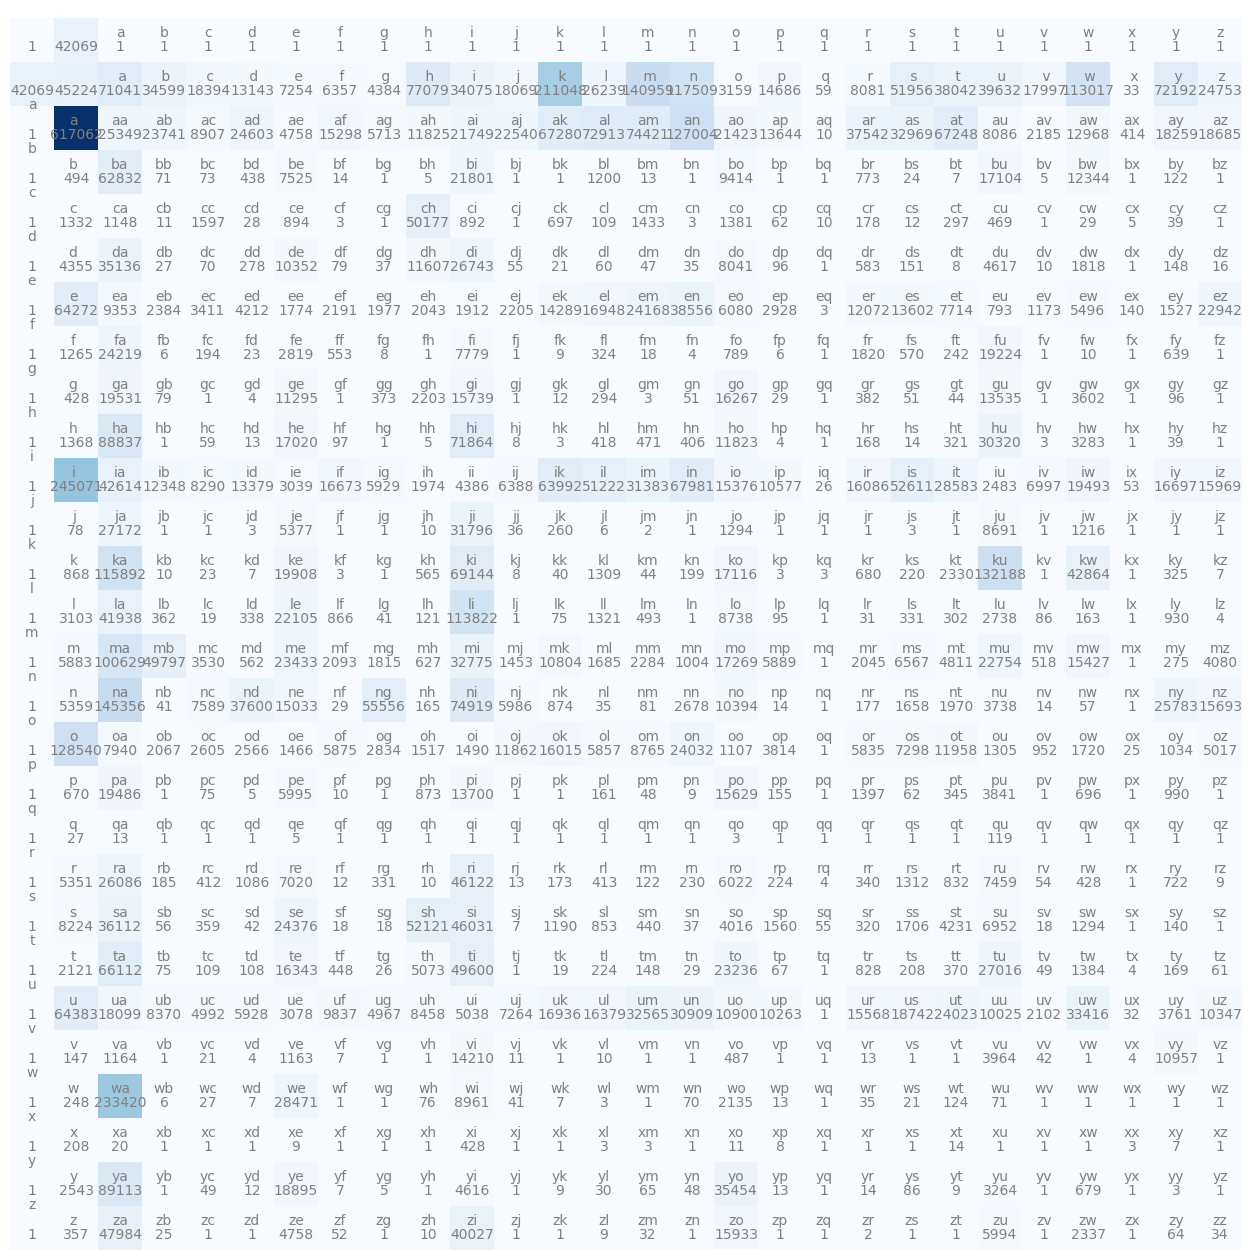

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(B, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, B[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")